# Кейс Diamonds

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl

### Проблема левой сингулярной матрицы. Неполный сингулярный базис

#### Генерация синтетических данных

In [14]:
N = 2000

x1 = np.random.normal(0, 10, N)
x2 = np.random.normal(0, 10, N)

df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2

X = df.to_numpy()

U, Sigma, V = np.linalg.svd(X)
U, Sigma, V

(array([[-4.08160424e-03, -4.39308577e-03, -1.12763493e-02, ...,
          2.51697933e-02,  1.81150970e-02, -1.95123850e-02],
        [ 1.20821046e-02, -4.06749066e-02,  3.50438860e-03, ...,
          3.80664160e-02,  1.29918878e-02, -3.70125866e-02],
        [-1.06434060e-02, -5.11473493e-03,  9.99861011e-01, ...,
          1.45548340e-04,  1.56451168e-04, -8.59086956e-05],
        ...,
        [-7.52531302e-03,  4.50010980e-02,  1.55097220e-04, ...,
          9.97992025e-01, -9.23511488e-04,  1.82832934e-03],
        [ 4.40391608e-03,  2.18452877e-02,  1.60326106e-04, ...,
         -9.16820718e-04,  9.99515615e-01,  8.02131779e-04],
        [ 1.09482216e-02, -4.03769791e-02, -9.48724296e-05, ...,
          1.83181397e-03,  8.09826611e-04,  9.98315059e-01]]),
 array([455.24517508, 435.29878373]),
 array([[ 0.7032189,  0.7109734],
        [ 0.7109734, -0.7032189]]))

#### Немного теории
##### Сингулярное разложение
$$ X = U \Sigma V^{-1} $$

##### Неполный левый сингулярный базис
Если мы раскладываем матрицу X размером n*2, то в полученной матрице U столбцы с 3 по n-й получаются лишними(не участвующими в разожении, не несущими никакой полезной информации)

#### Решение проблемы с переполнением памяти

In [19]:
N = 2000000

x1 = np.random.normal(0, 10, N)
x2 = np.random.normal(0, 10, N)

df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2

X = df.to_numpy()

U, Sigma, V = np.linalg.svd(X, full_matrices=False)
U, Sigma, V

(array([[-0.00092672, -0.00156903],
        [ 0.00032733, -0.00011972],
        [ 0.00164256, -0.00066404],
        ...,
        [ 0.00077534,  0.0011081 ],
        [-0.00013442,  0.00072009],
        [-0.00035361,  0.00044101]]),
 array([14154.8698957 , 14144.50123232]),
 array([[-0.92779254,  0.3730965 ],
        [-0.3730965 , -0.92779254]]))

### Чтение данных

In [57]:
df = pd.read_csv('diamonds.csv').drop(df.columns[[0]], axis = 1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [58]:
# Подавление выбросов

df_clear = df.copy()

df_clear.loc[df_clear['x'] < 2, 'x'] = 2
df_clear.loc[df_clear['x'] > 11, 'x'] = 11

df_clear.loc[df_clear['y'] < 2, 'y'] = 2
df_clear.loc[df_clear['y'] > 11, 'y'] = 11

df_clear.loc[df_clear['z'] < 2, 'z'] = 2
df_clear.loc[df_clear['z'] > 7, 'z'] = 7

df_clear.loc[df_clear['table'] < 45, 'table'] = 45
df_clear.loc[df_clear['table'] > 75, 'table'] = 75

df_clear.loc[df_clear['depth'] < 50, 'depth'] = 50
df_clear.loc[df_clear['depth'] > 75, 'depth'] = 75

df_clear.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749568,57.456776,3932.799722,5.731454,5.733512,3.539033
std,0.474011,1.426506,2.228784,3989.439738,1.120509,1.112673,0.692361
min,0.200000,50.000000,45.000000,326.000000,2.000000,2.000000,2.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,75.000000,75.000000,18823.000000,10.740000,11.000000,7.000000


In [59]:
# Кодирование категориальных данных методом replace

df_rank = df_clear.copy()

df_rank = df_rank.replace({'cut':{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}})

df_rank = df_rank.replace({'color':{'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}})

df_rank = df_rank.replace({'clarity':{'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}})

df = df_rank
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


### Обучаем модель

In [60]:
X = df.drop(columns=['price']).to_numpy()
y = df[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9075444677674195

### Центрирование данных

In [61]:


df_center = df.drop(columns=['price'])
cols = df_center.columns
for i in range(len(cols)):
    df_center[cols[i]] = df_center[cols[i]] - df_center[cols[i]].mean()

df_center

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.56794,1.095903,1.594197,-2.05102,-0.249568,-2.456776,-1.781454,-1.753512,-1.109033
1,-0.58794,0.095903,1.594197,-1.05102,-1.949568,3.543224,-1.841454,-1.893512,-1.229033
2,-0.56794,-1.904097,1.594197,0.94898,-4.849568,7.543224,-1.681454,-1.663512,-1.229033
3,-0.50794,0.095903,-2.405803,-0.05102,0.650432,0.543224,-1.531454,-1.503512,-0.909033
4,-0.48794,-1.904097,-3.405803,-2.05102,1.550432,0.543224,-1.391454,-1.383512,-0.789033
...,...,...,...,...,...,...,...,...,...
53935,-0.07794,1.095903,2.594197,-1.05102,-0.949568,-0.456776,0.018546,0.026488,-0.039033
53936,-0.07794,-1.904097,2.594197,-1.05102,1.350432,-2.456776,-0.041454,0.016488,0.070967
53937,-0.09794,-0.904097,2.594197,-1.05102,1.050432,2.543224,-0.071454,-0.053512,0.020967
53938,0.06206,0.095903,-1.405803,-2.05102,-0.749568,0.543224,0.418546,0.386488,0.200967


### Сингулярное разложение

In [62]:
X = df_center.to_numpy()
U, Sigma, V = np.linalg.svd(X, full_matrices=False)
U, Sigma, V

(array([[-5.08682531e-03,  1.65494413e-03,  6.25269609e-03, ...,
         -8.52172176e-03, -6.22042904e-04,  2.04410144e-03],
        [ 3.87468373e-03,  9.26904293e-03,  2.29254964e-03, ...,
         -9.92548986e-03, -2.22846108e-03, -3.27255402e-03],
        [ 1.04468502e-02,  1.59881525e-02, -2.92078193e-03, ...,
         -8.76118134e-03, -7.51564655e-03, -1.72882752e-03],
        ...,
        [ 3.65760274e-03,  3.75377419e-03,  6.48623869e-03, ...,
          3.45099937e-03, -3.54803697e-04,  1.96432748e-03],
        [ 2.69801486e-03, -2.93901892e-03,  9.83923462e-05, ...,
          4.03980448e-03,  7.88855345e-04, -1.69547391e-03],
        [-3.50683532e-03, -1.76712406e-03,  8.88782047e-03, ...,
          3.36680611e-03, -1.01264494e-03,  2.11109233e-03]]),
 array([569.15927672, 459.3733358 , 393.91233475, 333.92468426,
        284.90456094, 190.58066471,  22.01252649,  11.20013019,
         10.76562667]),
 array([[ 9.90443985e-02, -2.18203301e-01, -1.18651000e-01,
         -2.86875

### Визуализация сингулярных значений

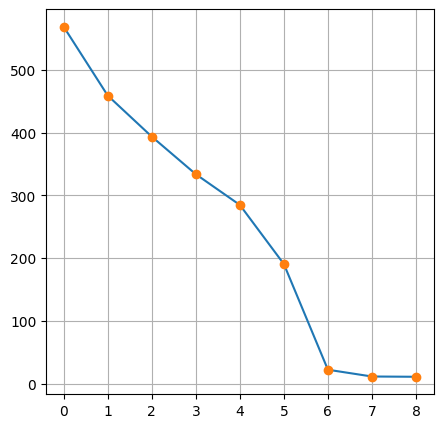

In [63]:
plt.figure(figsize=(5,5))

plt.grid()

plt.plot(np.arange(len(Sigma)), Sigma, '-')
plt.plot(np.arange(len(Sigma)), Sigma, 'o')

plt.show()

### Переход к сингулярному базису

In [64]:
S = np.dot(X, V.T)

df_center_S = pd.DataFrame(data = S, columns=['s1', 's2', 's3', 's4','s5','s6','s7','s8','s9'])

df_center_S['price'] = df['price']
df_center_S

,s1,s2,s3,s4,s5,s6,s7,s8,s9,price
0,-2.895214,0.760237,2.463014,0.497830,2.551305,0.169412,-0.187585,-0.006967,0.022006,326
1,2.205312,4.257951,0.903064,0.288157,2.176327,0.406182,-0.218485,-0.024959,-0.035231,326
2,5.945922,7.344531,-1.150532,1.037056,1.147574,-1.362685,-0.192856,-0.084176,-0.018612,327
3,-0.291306,0.392683,-1.854287,-1.786605,2.254524,0.497174,-0.088394,-0.000293,0.028466,334
4,0.771032,-1.134771,-1.025428,-3.488423,3.334509,-0.785554,-0.046163,0.016666,0.018590,335
...,...,...,...,...,...,...,...,...,...,...
53935,-0.468659,0.888006,2.383009,1.804300,-0.003467,0.458010,0.047199,-0.005061,0.002844,2757
53936,-1.846566,-0.512574,3.286925,-1.037696,-0.909104,-1.716970,0.064894,-0.008565,0.025325,2757
53937,2.081759,1.724384,2.555009,-1.223524,-0.784337,0.536257,0.075965,-0.003974,0.021147,2757
53938,1.535600,-1.350107,0.038758,0.518031,1.719348,-0.052013,0.088926,0.008835,-0.018253,2757


### Обучаем модель

In [66]:
X = df_center_S.drop(columns=['price']).to_numpy()
y = df_center_S[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9075444677674195

### Понижение размерности на 1

In [67]:
X = df_center_S.drop(columns=['price', 's9']).to_numpy()
y = df_center_S[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9066102015583637

### Понижение размерности на 2

In [68]:
X = df_center_S.drop(columns=['price', 's9', 's8']).to_numpy()
y = df_center_S[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9065897419798973

### Понижение размерности на 3

In [69]:
X = df_center_S.drop(columns=['price', 's9', 's8', 's7']).to_numpy()
y = df_center_S[['price']].to_numpy()

model = skl.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.8442702008805485